In [1]:
# to read the dataframe
import pandas as pd

# Reading the dataset as a dataframe

In [2]:
# Reading dataframes
goods_df = pd.read_csv('dairy_dataset.csv')

In [3]:
goods_df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


# Discovering the dataset

In [4]:
#show the number of cells in the dataframe
print("goods dataframe size: ", goods_df.size)

#show the number of records (rows) in the dataframe
print("number of goods: ", len(goods_df))

goods dataframe size:  99475
number of goods:  4325


In [5]:
goods_df.dtypes

Location                                object
Total Land Area (acres)                float64
Number of Cows                           int64
Farm Size                               object
Date                                    object
Product ID                               int64
Product Name                            object
Brand                                   object
Quantity (liters/kg)                   float64
Price per Unit                         float64
Total Value                            float64
Shelf Life (days)                        int64
Storage Condition                       object
Production Date                         object
Expiration Date                         object
Quantity Sold (liters/kg)                int64
Price per Unit (sold)                  float64
Approx. Total Revenue(INR)             float64
Customer Location                       object
Sales Channel                           object
Quantity in Stock (liters/kg)            int64
Minimum Stock

In [6]:
goods_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

Categorize Land Area into Small, Medium, Large, and Extra Large Categories


To explore the relationship between land size and total sales, we want to categorize the land area using the Total Land Area (acres) column into meaningful categories: Small, Medium, Large, and Extra Large. We will use the following ranges to define each category: 0, 50, 100, 200, and inf.


Create a new column named LandAreaCategory and store the result in this column. The categories should be as follows:


Small: land areas between 0 and 50 acres. Medium: land areas between 50 and 100 acres. Large: land areas between 100 and 200 acres. Extra Large: land areas above 200 acres.

In [7]:
goods_df['LandAreaCategory'] = pd.cut(goods_df['Total Land Area (acres)'], bins=[0, 50, 100, 200, float('inf')], labels=['Small', 'Medium', 'Large', 'Extra Large'])
goods_df['LandAreaCategory']

0       Extra Large
1             Small
2       Extra Large
3       Extra Large
4       Extra Large
           ...     
4320    Extra Large
4321    Extra Large
4322    Extra Large
4323    Extra Large
4324    Extra Large
Name: LandAreaCategory, Length: 4325, dtype: category
Categories (4, object): ['Small' < 'Medium' < 'Large' < 'Extra Large']

Categorize Product Prices into Different Price Categories


In order to analyze the distribution of sales across different price levels, we need to categorize the prices of our products. We will use the Price per Unit column to do this.

Below are the price categories and their corresponding price ranges:

Low: prices between 0 and 10 Medium: prices between 10 and 20 High: prices between 20 and 30 Premium: prices above 30

In [8]:
goods_df['PriceCategory'] = pd.cut(goods_df['Price per Unit'], bins=[0, 10, 20, 30, float('inf')], labels=['Low', 'Medium', 'High', 'Premium'])
goods_df['PriceCategory']

0       Premium
1       Premium
2       Premium
3          High
4       Premium
         ...   
4320    Premium
4321    Premium
4322    Premium
4323     Medium
4324    Premium
Name: PriceCategory, Length: 4325, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Premium']

Creating Dummy Variables for Dairy Brands

To examine the impact of different dairy brands on sales performance, we will create dummy variables for each brand using the Brand column. The dummy variables should have the prefix Brand and use the default separator.

Store the resulting dummy variables in the variable brand_dummies.

In [9]:
brand_dummies = pd.get_dummies(goods_df['Brand'], prefix='Brand')
brand_dummies 

,Brand_Amul,Brand_Britannia Industries,Brand_Dodla Dairy,Brand_Dynamix Dairies,Brand_Mother Dairy,Brand_Palle2patnam,Brand_Parag Milk Foods,Brand_Passion Cheese,Brand_Raj,Brand_Sudha,Brand_Warana
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4320,0,0,0,0,1,0,0,0,0,0,0
4321,0,0,0,0,0,1,0,0,0,0,0
4322,0,0,0,0,1,0,0,0,0,0,0
4323,0,0,0,0,0,0,0,0,1,0,0


Investigating the Effect of Product Shelf Life on Customer Demand

We want to analyze the impact of product shelf life on customer demand by discretizing the Shelf Life (days) column into different categories. To do this, create a new column called ShelfLifeCategory to store the results. The categories should be as follows:

Short: shelf life between 0 and 7 days Medium: shelf life between 7 and 14 days Long: shelf life between 14 and 30 days Very Long: shelf life above 30 days

In [10]:
goods_df['ShelfLifeCategory'] = pd.cut(goods_df['Shelf Life (days)'], bins=[0, 7, 14, 30, float('inf')], labels=['Short', 'Medium', 'Long', 'Very Long'], include_lowest=True)
goods_df['ShelfLifeCategory']

0            Long
1            Long
2            Long
3       Very Long
4          Medium
          ...    
4320        Short
4321         Long
4322        Short
4323        Short
4324        Short
Name: ShelfLifeCategory, Length: 4325, dtype: category
Categories (4, object): ['Short' < 'Medium' < 'Long' < 'Very Long']

Categorizing Storage Conditions Using Dummy Variables for Sales Analysis

Create dummy variables for the Storage Condition column, which contains different conditions such as refrigerated and ambient. 

This will allow us to examine the effects of storage conditions on sales. Use the prefix "Storage" and the default separator when creating the dummy variables. Save the resulting dataframe in a variable named storage_dummies.

In [11]:
storage_dummies = pd.get_dummies(goods_df['Storage Condition'], prefix='Storage')
storage_dummies 

,Storage_Ambient,Storage_Frozen,Storage_Polythene Packet,Storage_Refrigerated,Storage_Tetra Pack
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
4320,0,0,0,1,0
4321,0,0,0,1,0
4322,0,0,0,1,0
4323,0,0,0,1,0


Create Binary Indicators for Different Sales Channels to Identify Effective Channels for Dairy Sales

Create binary indicators for different sales channels, such as online and offline, to identify the most effective channels for dairy sales. Use the prefix Channel: as a separator for each indicator. Save the results in a variable called channel_dummies.

In [12]:
channel_dummies = pd.get_dummies(goods_df['Sales Channel'], prefix='Channel', prefix_sep=':')
channel_dummies

,Channel:Online,Channel:Retail,Channel:Wholesale
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
4320,1,0,0
4321,0,1,0
4322,0,1,0
4323,0,0,1


Discretize Production Dates into Monthly Time Periods for Analyzing Seasonal Sales Trends

In order to analyze the seasonal sales trends, we need to categorize the production dates into specific time periods (months) and create a new column called ProductionMonth.

The production dates will be divided into different time periods based on month ranges throughout the dataset, leaving the first interval inclusive. Each time period will be labeled with a number from 1 to the length of the month bins.

Once the categorization is completed, the results should be stored in the ProductionMonth column.

In [13]:
# Using `pd.to_datetime` method to deal with `Production Date` column as a datetime format.
goods_df['Production Date'] = pd.to_datetime(goods_df['Production Date'])

# Using `pd.date_range()` method with `start` parameter set as the minimum date in `Production Date` and the `end` parameter set 
# as the maximum date in `Production Date` with the `freq` parameter set to `M` to have a time delta of months.
production_month_bins = pd.date_range(start=goods_df['Production Date'].min(), end=goods_df['Production Date'].max(), freq='M')

# Using pd.cut() method with the calculated bins and labels and setting the `include_lowest` parameter to `True` to include the 
# first interval.
goods_df['ProductionMonth'] = pd.cut(goods_df['Production Date'], bins=production_month_bins, labels=range(1, len(production_month_bins)), include_lowest=True)

# Display the dataframe to confirm the changes
goods_df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),LandAreaCategory,PriceCategory,ShelfLifeCategory,ProductionMonth
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03,Extra Large,Premium,Long,37
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,21895.92,Kerala,Wholesale,129,43.17,181.10,Small,Premium,Long,35
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,8655.36,Madhya Pradesh,Online,247,15.10,140.83,Extra Large,Premium,Long,38
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,17380.92,Rajasthan,Online,222,74.50,57.68,Extra Large,High,Very Long,6
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,12045.15,Jharkhand,Retail,2,76.02,33.40,Extra Large,Premium,Medium,23


Categorize Stock Levels into Low, Medium, and High Categories

To assess the adequacy of stock levels and determine optimal replenishment strategies, we need to analyze the Quantity in Stock (liters/kg) column. We will categorize the stock levels into three meaningful categories:

Low - for stock levels below the first quantile Medium - for stock levels between the first and second quantiles High - for stock levels above the second quantile

In [14]:
goods_df['StockCategory'], stock_bins = pd.qcut(goods_df['Quantity in Stock (liters/kg)'], q=3, labels=['Low', 'Medium', 'High'], retbins=True)
goods_df['StockCategory'], stock_bins 

(0       Medium
 1       Medium
 2       Medium
 3       Medium
 4          Low
          ...  
 4320    Medium
 4321      High
 4322      High
 4323       Low
 4324      High
 Name: StockCategory, Length: 4325, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array([  0., 100., 309., 976.]))

Categorize Revenue into Low, Medium, High, and Premium Segments

Sort the revenue, from the 'Approx. Total Revenue(INR)' column, into four distinctive categories: Low, Medium, High, and Premium.

The classification guidelines are as follows:

Low for the first quarter of revenue (first 25%) Medium for the second quarter (25% to 50%) High for the third quarter (50% to 75%) Premium for the last quarter (75% to 100%) Generate these categories and include them in a newly created column named RevenueCategory.

In [15]:
goods_df['RevenueCategory'] = pd.qcut(goods_df['Approx. Total Revenue(INR)'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])
goods_df['RevenueCategory'] 

0           Low
1       Premium
2          High
3          High
4          High
         ...   
4320    Premium
4321     Medium
4322       High
4323        Low
4324       High
Name: RevenueCategory, Length: 4325, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Premium']

Analyze Reorder Quantities: Segregate the 'Reorder Quantity (liters/kg)' 

Into Four Sections - Low, Medium, High, Very High
To optimize reorder amounts for various dairy products, characterize the 'Reorder Quantity (liters/kg)' column into four categories: Low, Medium, High, and Very High.

The outcome should be saved in a new column known as 'ReorderCategory'. Detailed information on how to categorize would look like this:

'Low' refers to the first quarter of reorder quantities (first 25%). 'Medium' implies the second quarter (25% to 50%). 'High' comprises the third quarter (50% to 75%). 'Very High' represents the fourth quarter (75% to 100%).

In [17]:
goods_df['ReorderCategory'] = pd.qcut(goods_df['Reorder Quantity (liters/kg)'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
goods_df['ReorderCategory'] 

0             Low
1       Very High
2            High
3             Low
4             Low
          ...    
4320          Low
4321         High
4322    Very High
4323    Very High
4324    Very High
Name: ReorderCategory, Length: 4325, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

Plot a bar chart to examine the stock levels StockCategory by counting the number of goods in each category

<Axes: title={'center': 'Distribution of Stock Categories'}, xlabel='Stock Category', ylabel='Count'>

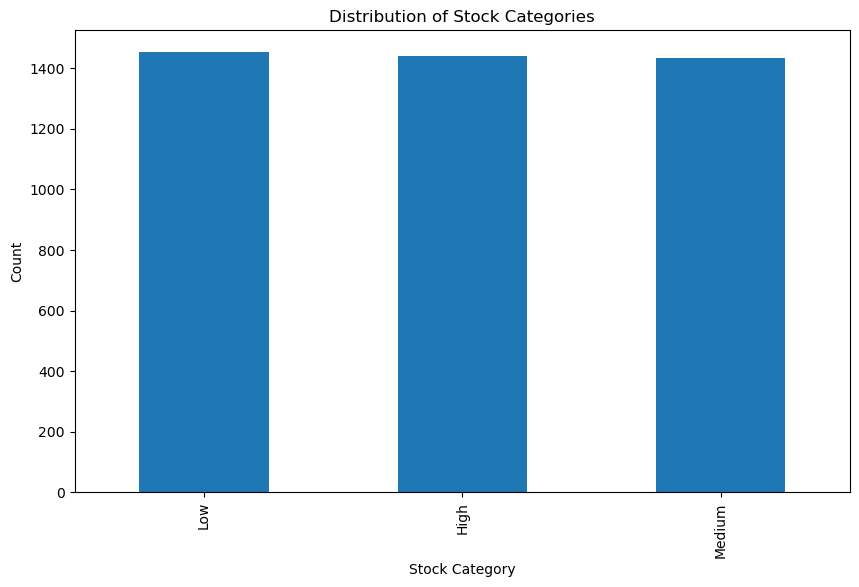

In [18]:
stock_category_plot = goods_df['StockCategory'].value_counts().plot(kind='bar', xlabel='Stock Category', ylabel='Count', title='Distribution of Stock Categories', figsize=(10, 6))
stock_category_plot

Generate a line plot to analyze the monthly production trends ProductionMonth by calculating the sum of Quantity (liters/kg) per ProductionMonth


In [19]:
 monthly_production = goods_df.groupby('ProductionMonth')['Quantity (liters/kg)'].sum()
 monthly_production

ProductionMonth
1     42387.93
2     49834.63
3     36775.52
4     43857.51
5     43988.82
6     46439.41
7     48416.34
8     49811.69
9     45610.15
10    42540.68
11    40412.94
12    53739.90
13    36059.19
14    57518.59
15    51682.55
16    52323.54
17    35633.43
18    58903.55
19    46562.03
20    47914.41
21    46494.18
22    54272.04
23    36938.88
24    34938.73
25    45473.85
26    46416.03
27    47749.26
28    36769.15
29    42107.48
30    45326.38
31    51111.13
32    39151.70
33    39025.65
34    45956.04
35    41114.95
36    55810.90
37    53780.72
38    52697.55
39    36295.59
40    46044.19
41    34833.54
42    48405.76
43    32873.43
44    33031.21
45    45886.18
46    41009.44
47    42642.46
48    33398.50
Name: Quantity (liters/kg), dtype: float64

<Axes: title={'center': 'Monthly Production Trends'}, xlabel='Production Month', ylabel='Total Quantity'>

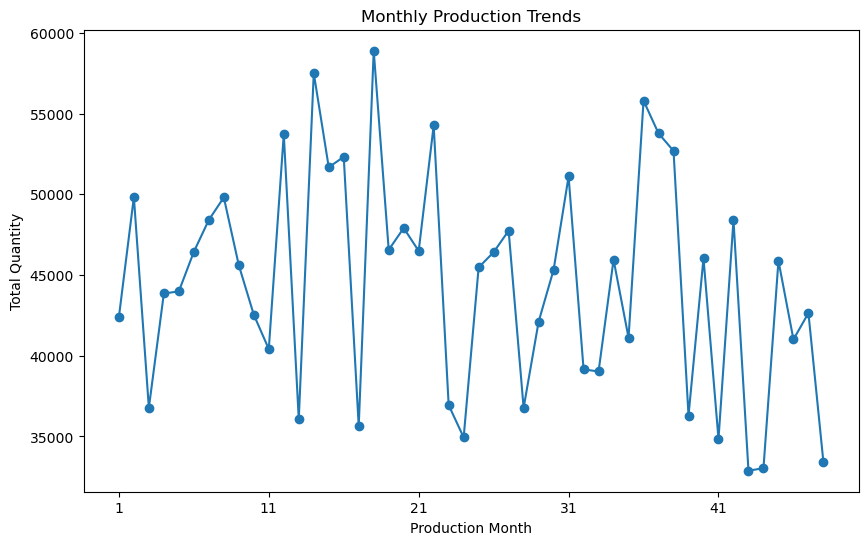

In [20]:
monthly_production_plot = monthly_production.plot(kind='line', marker='o', xlabel='Production Month', ylabel='Total Quantity', title='Monthly Production Trends', figsize=(10, 6))
monthly_production_plot